**Calculate the rates of return of a portfolio of stocks**

In general,
- use simple rate of return when there is a single security whose rate of return is needed over multile time periods.
- when log return to calculate returns of multiple securities over the same time period



**2. Extract data using an API**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


https://pandas-datareader.readthedocs.io/en/latest/readers/yahoo.html

Download data

In [ ]:
tickers = ['UL', 'MSFT', 'GOOG', 'AMZN', 'AAPL']
df = pd.DataFrame()
for t in tickers:
    df[t] = yf.download(t, start='2013-1-1')['Adj Close']

df.info()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2013-01-02 to 2023-11-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UL      2744 non-null   float64
 1   MSFT    2744 non-null   float64
 2   GOOG    2744 non-null   float64
 3   AMZN    2744 non-null   float64
 4   AAPL    2744 non-null   float64
dtypes: float64(5)
memory usage: 128.6 KB


check if the data is ok using the head() and tail() functions of pandas

In [ ]:
df.head()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2013-01-02,26.974930,22.574514,18.013729,12.8655,16.769089
2013-01-03,26.753656,22.272104,18.024191,12.9240,16.557430
2013-01-04,26.898869,21.855274,18.380356,12.9575,16.096226
2013-01-07,26.774412,21.814407,18.300158,13.4230,16.001554
2013-01-08,26.795153,21.699974,18.264042,13.3190,16.044611


In [ ]:
df.tail()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2023-11-17,47.340000,369.850006,136.940002,145.179993,189.690002
2023-11-20,46.980000,377.440002,137.919998,146.130005,191.449997
2023-11-21,47.660000,373.070007,138.619995,143.899994,190.639999
2023-11-22,47.779999,377.850006,140.020004,146.710007,191.309998
2023-11-24,47.930000,377.429993,138.220001,146.740005,189.970001


**Normalize to 100**

$$
\frac {P_t}{P_0} * 100
$$

Normalizing enables to compare the price of different stocks over time

In [ ]:
df.loc['2013-01-02']

UL      26.974930
MSFT    22.574514
GOOG    18.013729
AMZN    12.865500
AAPL    16.769089
Name: 2013-01-02 00:00:00, dtype: float64

In [ ]:
df.iloc[0]

UL      26.974930
MSFT    22.574514
GOOG    18.013729
AMZN    12.865500
AAPL    16.769089
Name: 2013-01-02 00:00:00, dtype: float64

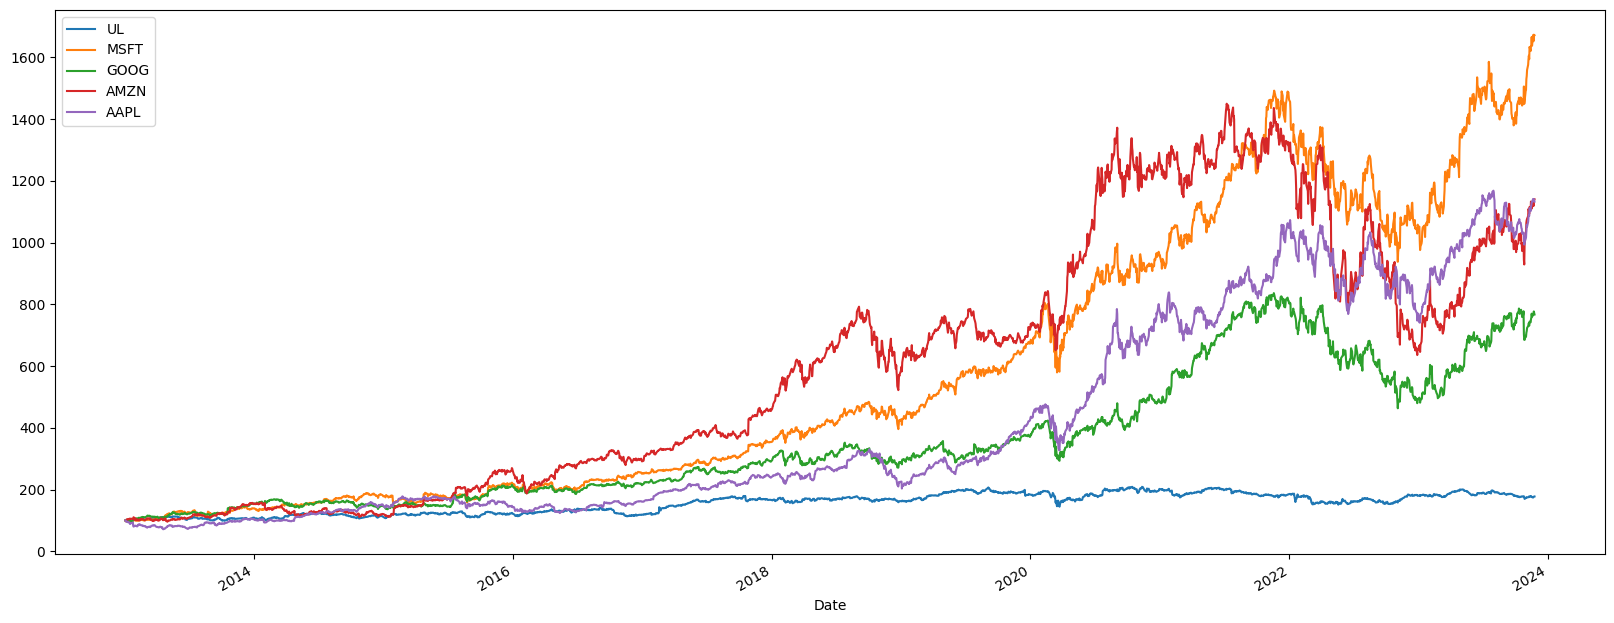

In [ ]:
(df / df.iloc[0] * 100).plot(figsize = (20, 8));
plt.show()

**Calculate returns of the portfolio of securities**



Log Return of a Security

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [ ]:
# Calculate daily simple rate of returns
returns = np.log(df / df.shift(1))
returns.head()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008237,-0.013487,0.000581,0.004537,-0.012702
2013-01-04,0.005413,-0.018893,0.019568,0.002589,-0.028250
2013-01-07,-0.004638,-0.001872,-0.004373,0.035295,-0.005899
2013-01-08,0.000774,-0.005260,-0.001975,-0.007778,0.002687


**Annual returns the securities**

In [ ]:
#Annual returns
annual_returns = returns.mean() * 250
annual_returns

UL      0.052391
MSFT    0.256705
GOOG    0.185719
AMZN    0.221848
AAPL    0.221229
dtype: float64

In [ ]:
# Daily Risk
#returns['MSFT'].std()
returns.std()

UL      0.013130
MSFT    0.016976
GOOG    0.017246
AMZN    0.020591
AAPL    0.017967
dtype: float64

**Variance of return**

In [ ]:
#daily variance of returns
returns.var()

UL      0.000172
MSFT    0.000288
GOOG    0.000297
AMZN    0.000424
AAPL    0.000323
dtype: float64

In [ ]:
#annual variance of returns
Var = returns.var()*250
Var

UL      0.043100
MSFT    0.072044
GOOG    0.074360
AMZN    0.106000
AAPL    0.080707
dtype: float64

In [ ]:
Var[1]

0.07204373023764439

&radic; (Var.250) = &radic; (s<sup>2</sup>.250) = s.&radic;250

In [ ]:
#Annual Risk
returns.std() * 250 ** 0.5

UL      0.207606
MSFT    0.268410
GOOG    0.272691
AMZN    0.325577
AAPL    0.284090
dtype: float64

**Portfolio annual return**

In [ ]:
#weights of the securities
weights1 = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
weights2 = np.array([0.2,0.3,0.15,0.15,0.2])

In [ ]:
#Portfolio1
portfolio_annual_return1 = np.dot(annual_returns, weights1)
print("Portfolio Annual return %: ", 100*portfolio_annual_return1)

Portfolio Annual return %:  18.757841046026257


In [ ]:
#Portfolio2
portfolio_annual_return2 = np.dot(annual_returns, weights2)
print("Portfolio Annual return %: ", 100*portfolio_annual_return2)

Portfolio Annual return %:  19.287052488198007


**Calculate the risk of the securities**

Standard deviation of return is the risk or volatility of returns of a stock. It measures the deviation from the mean.

Daily Risk

In [ ]:
returns.std()

UL      0.013130
MSFT    0.016976
GOOG    0.017246
AMZN    0.020591
AAPL    0.017967
dtype: float64

Annual risk

In [ ]:
returns.std()*250**0.5

UL      0.207606
MSFT    0.268410
GOOG    0.272691
AMZN    0.325577
AAPL    0.284090
dtype: float64

**Covariance**

<br>To what extent do variables change together. Covariance calculated from a sample is given below. <br>
We can get the direction of the relationship but not the strength as it is dependent on the scale of the variables. <br>

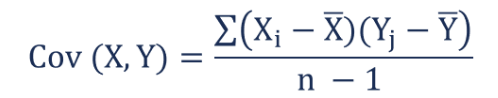

Xi - the values of the X-variable <br>
Yj - the values of the Y-variable <br>
X̄ - the mean (average) of the X-variable <br>
Ȳ - the mean (average) of the Y-variable <br>
n - the number of data points <br>

source: https://corporatefinanceinstitute.com/resources/data-science/covariance/

In [ ]:
cov_matrix_a = returns.cov() * 250
cov_matrix_a

,UL,MSFT,GOOG,AMZN,AAPL
UL,0.043100,0.020178,0.018149,0.016790,0.018578
MSFT,0.020178,0.072044,0.050085,0.051835,0.047481
GOOG,0.018149,0.050085,0.074360,0.056081,0.044056
AMZN,0.016790,0.051835,0.056081,0.106000,0.046246
AAPL,0.018578,0.047481,0.044056,0.046246,0.080707


**Correlation**

Measures the strength of the relationship between variables. It is independent of the scales of the vairables and is between -1 and +1. +ve correlation indicate the two variables move in the same direction. -ve correlation indicate the two variables move in the opposite direction. Higher the absolute value of the correlation, higher the extent of variation. <br>
https://www.investopedia.com/terms/c/correlationcoefficient.asp

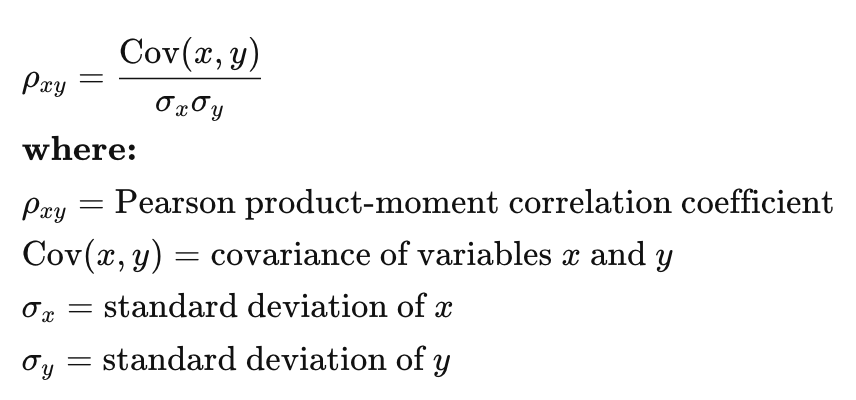

Do the returns of the securities correlate with each other

In [ ]:
returns.corr()

,UL,MSFT,GOOG,AMZN,AAPL
UL,1.000000,0.362109,0.320589,0.248397,0.314999
MSFT,0.362109,1.000000,0.684284,0.593162,0.622685
GOOG,0.320589,0.684284,1.000000,0.631677,0.568700
AMZN,0.248397,0.593162,0.631677,1.000000,0.499991
AAPL,0.314999,0.622685,0.568700,0.499991,1.000000


**Calculate portfolio risk**

Portfolio variance measures the risk in a given portfolio, caoculated using the variance of the individual assets in the portfolio. The portfolio variance is equal to the portfolio's standard deviation squared.

The formula for portfolio variance in a two-asset portfolio is as follows: <br>

Portfolio variance = w<sub>1</sub><sup>2</sup>σ<sub>1</sub><sup>2</sup> + w<sub>2</sub><sup>2</sup>σ<sub>2</sub><sup>2</sup> + 2w<sub>1</sub>w<sub>2</sub>σ<sub>1,2</sub> <br>
Where:

w<sub>1</sub> = the portfolio weight of the first asset <br>
w<sub>2</sub> = the portfolio weight of the second asset <br>
σ<sub>1</sub> = the standard deviation of the first asset <br>
σ<sub>2</sub> = the standard deviation of the second asset <br>
σ<sub>1,2</sub> = the co-variance of the two assets, which can thus be expressed as p<sub>(1,2)</sub>σ<sub>1</sub>σ<sub>2</sub>, where p<sub>(1,2)</sub> is the correlation co-efficient between the two assets <br>

source: https://www.investopedia.com/terms/p/portfolio-variance.asp <br>
A lower correlation between securities in a portfolio results in a lower portfolio variance. <br>
Overall portfolio variance is lower than a simple weighted average of the individual variances of the stocks in the portfolio. <br>
The level of risk can be measured using the standard deviation, which is the square root of the variance. If data points are far away from the mean, then the variance is high, and the overall level of risk in the portfolio is high as well. <br>
The higher the standard deviation, the more risk of the portfolio, while the opposite is true for a low standard deviation.

**Portfolio variance in matrix notation**

Portfolio variance = Transpose of weights vector * Covariance matrix * weights vector <br>
Portfolio variance = weights.T * Cov_matrix * weights

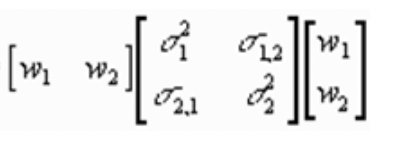

The first term is the transpose of the weights vector, weights.T= [w<sub>1</sub> &nbsp; &nbsp; w<sub>2</sub>] <br>
The second term is the covariance matrix, Cov_matrix <br>
The third term is the weights vector, weights


The above matrix form of the Porfolio variance of two stocks, can be extended to portfio of more than two stocks. <br>

In [ ]:
# weights of the portfolio
weights1 = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [ ]:
# Portfolio variance
portfolio_var = np.dot(weights1.T, np.dot(returns.cov() * 250, weights1))
print(portfolio_var)

0.04460682819715834


In [ ]:
# Portfolio volatility risk
portfolio_vol = (portfolio_var) ** 0.5
print('Portfolio volatility in %: ', round(100*portfolio_vol,5))

Portfolio volatility in %:  21.12033


**Diversifiable risk and Non-Diversifiable risk**

Total Variance = Systematic Variance + Unsystematic Variance

Unsystematic Variance = Total Variance - Systematic Variance

Unsystematic Risk = &radic;(Total Variance - Systematic Variance)

*Systematic Variance is not diversifiable* : inherent to the market as a whole, reflecting the impact of economic, geopolitical, and financial factors <br>
*Unsystematic Variance is diversifiable* : company specific or industry specific <br>
source: https://www.investopedia.com/terms/s/systematicrisk.asp#toc-example-systematic-risk-and-the-great-recession

In [ ]:
# Diversifiable risk
unsystematic_variance = portfolio_var - (weights1[0] ** 2 * Var[0]+weights1[1] ** 2 * Var[1]+weights1[2] ** 2 * Var[2]+weights1[3] ** 2 * Var[3]+weights1[4] ** 2 * Var[4])
unsystematic_variance

0.029558372178806306

In [ ]:
# Non-Diversifiable risk
systematic_variance = portfolio_var - unsystematic_variance
systematic_variance

0.015048456018352033

In [ ]:
# Non-Diversifiable risk
systematic_variance =  (weights1[0] ** 2 * Var[0]+weights1[1] ** 2 * Var[1]+weights1[2] ** 2 * Var[2]+weights1[3] ** 2 * Var[3]+weights1[4] ** 2 * Var[4])
systematic_variance

0.015048456018352033